In [1]:
import pandas as pd

df = pd.read_csv("../Census/race:ethnicity.csv")
mdata = pd.read_csv("resulthealth.csv")

data = pd.merge(df, mdata, on='Name')
data.dropna(axis=0, how='any', inplace=True)

data.head()


,Name,Non-Hispanic White alone,Non-Hispanic Black or African American alone,"Non-Hispanic Asian, Native Hawaiian and Pacific Islander alone",Hispanic or Latino,Others,Total,TotChild,OlderAdult,MedIllnes,...,STROKE_CrudePrev,HIGHCHOL_CrudePrev,GHLTH_CrudePrev,PHLTH_CrudePrev,MHLTH_CrudePrev,CSMOKING_CrudePrev,BINGE_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev
0,Allston,12443.0,1516.0,5194.0,2958.0,891.0,23000.0,173,144,2831.85,...,1.2,20.6,8.9,6.1,17.8,8.8,22.8,17.0,18.3,29.5
1,Back Bay,12361.0,736.0,2028.0,1761.0,597.0,17483.0,1686,3759,11842.96,...,1.8,27.7,8.9,6.5,14.6,7.8,21.2,16.3,18.5,28.2
3,Brighton,30965.0,2379.0,8046.0,5993.0,2220.0,49603.0,4244,5847,23936.80,...,1.6,24.3,8.9,6.5,16.2,8.6,22.3,16.8,18.6,28.7
4,Dorchester,28157.0,51088.0,11250.0,25366.0,9004.0,124865.0,17424,6535,25010.76,...,3.0,30.5,17.7,10.8,17.5,16.7,17.3,27.9,25.7,36.2
5,East Boston,15714.0,1133.0,2030.0,25247.0,1377.0,45501.0,8665,4147,14824.60,...,2.5,29.0,17.8,10.7,17.4,15.3,20.0,28.3,26.3,33.0


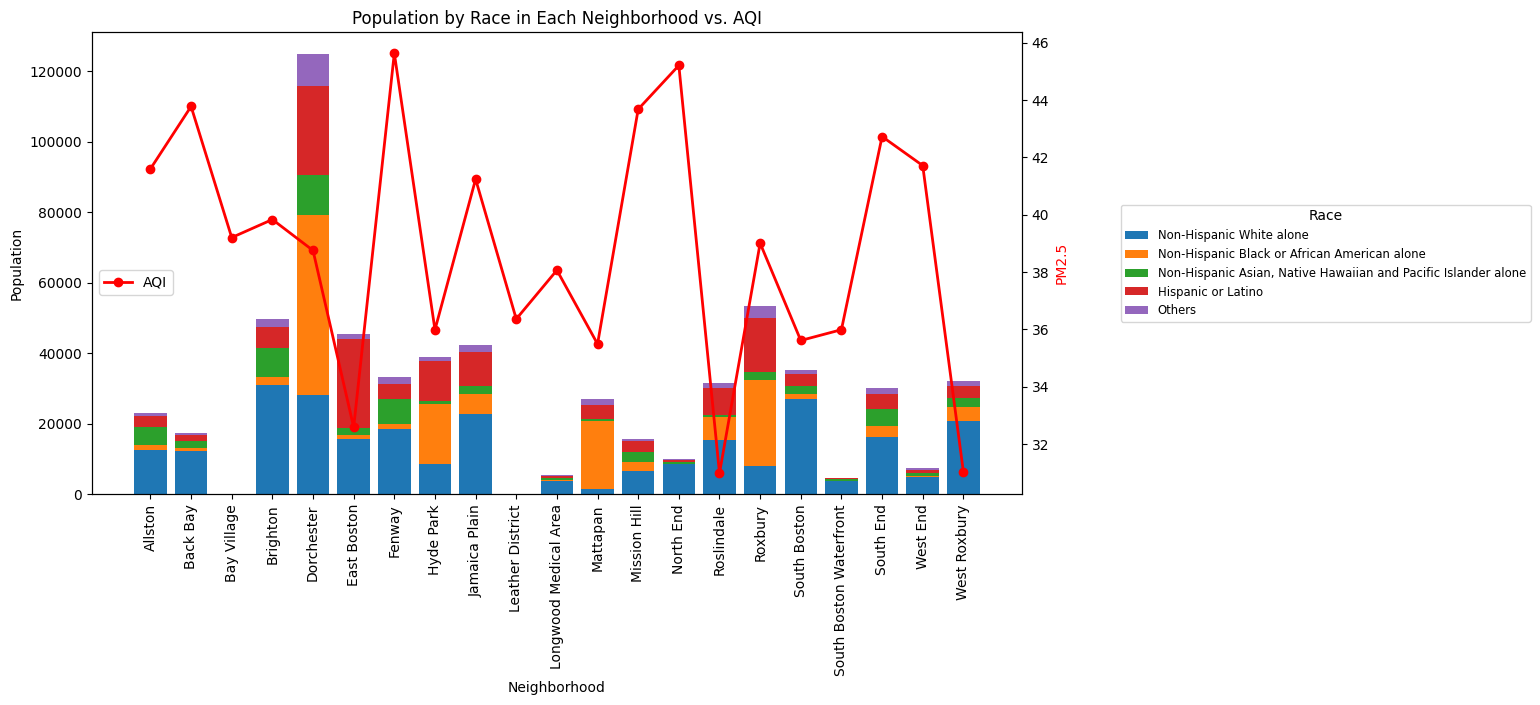

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Census/race:ethnicity.csv")
mdata = pd.read_csv("resulthealth.csv")

data = pd.merge(df, mdata, on='Name')

data['Population'] = data['Total']

selected_columns = data[['Name', 'Population', 'AQI']]

race_columns = ['Non-Hispanic White alone', 'Non-Hispanic Black or African American alone', 'Non-Hispanic Asian, Native Hawaiian and Pacific Islander alone', 'Hispanic or Latino', 'Others']

grouped_data = data.groupby('Name')[race_columns].sum()

fig, ax1 = plt.subplots(figsize=(12, 6))  

bottom = 0

legend_labels = []
for race in race_columns:
    ax1.bar(grouped_data.index, grouped_data[race], bottom=bottom, label=race)
    bottom += grouped_data[race]
    legend_labels.append(race)

ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Population')
ax1.set_title('Population by Race in Each Neighborhood vs. AQI')
ax1.set_xticks(grouped_data.index)
ax1.set_xticklabels(grouped_data.index, rotation=90)  

ax1.legend(legend_labels, title="Race", loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize='small')

ax2 = ax1.twinx()
ppi_data = data.groupby('Name')['AQI'].mean()
ax2.plot(ppi_data.index, ppi_data, marker='o', color='red', label='AQI', linewidth=2)
ax2.set_ylabel('PM2.5', color='red')

ax2.legend(['AQI'], loc="upper left", bbox_to_anchor=(0, 0.5))

plt.show()


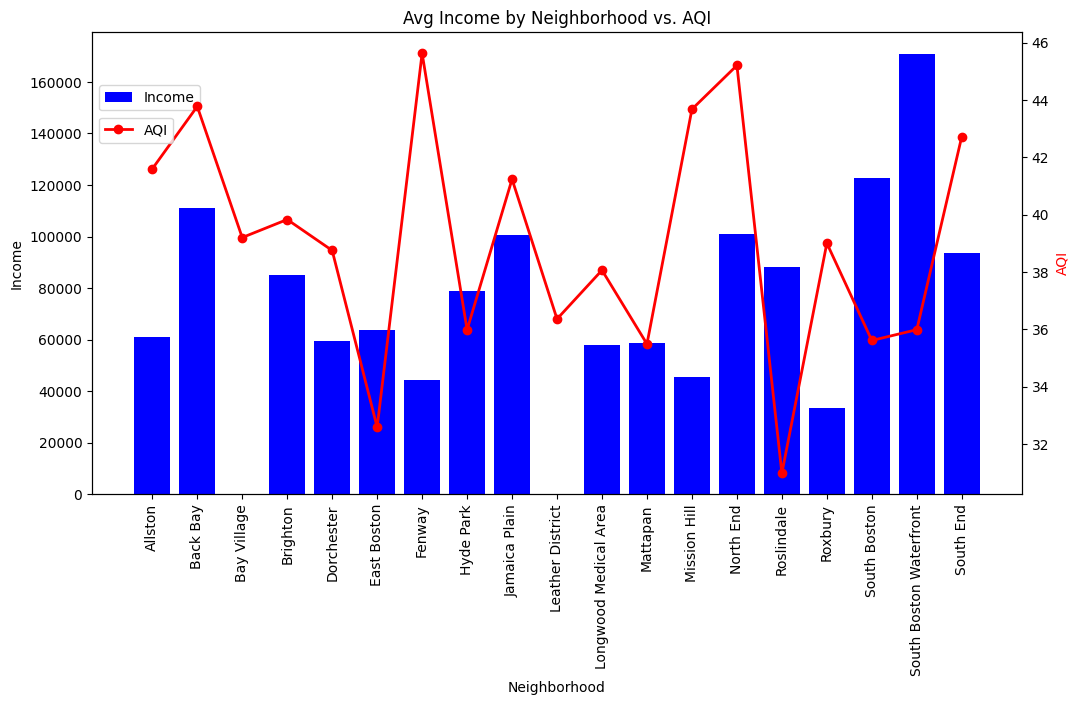

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Census/income.csv")
mdata = pd.read_csv("resulthealth.csv")

data = pd.merge(df, mdata, on='Name')

data['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'] = pd.to_numeric(data['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'], errors='coerce', downcast='integer')

selected_columns = data[['Name', 'Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)', 'AQI']]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Income', color='black')
ax1.set_title('Avg Income by Neighborhood vs. AQI')

selected_columns.reset_index(inplace=True, drop=True)

ax1.set_xticks(range(len(selected_columns)))
ax1.set_xticklabels(selected_columns['Name'], rotation=90)

ax1.bar(range(len(selected_columns)), selected_columns['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'], color='blue', label='Income')

ax2 = ax1.twinx()

ppi_data = data.groupby('Name')['AQI'].mean()

ax2.plot(range(len(ppi_data)), ppi_data, marker='o', color='red', label='AQI', linewidth=2)
ax2.set_ylabel('AQI', color='red')

ax1.legend(['Income'], loc="upper left", bbox_to_anchor=(0, 0.9))
ax2.legend(['AQI'], loc="upper left", bbox_to_anchor=(0, 0.83))

plt.show()


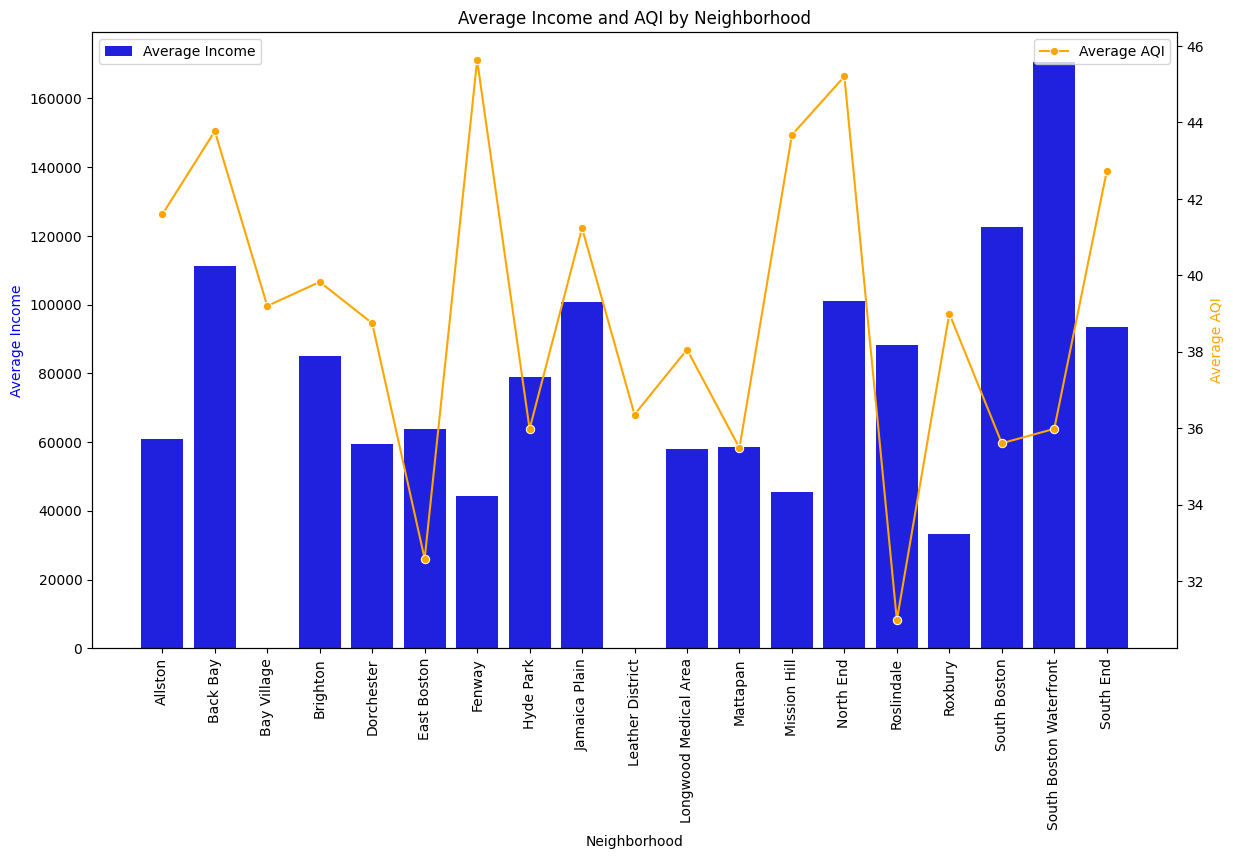

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values
income = income.dropna(subset=['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'])

# Group by neighborhood and calculate average income and AQI
neighborhood_stats = income.groupby('Name').agg({
    'Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)': 'mean',
    'AQI': 'mean'
}).reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a bar plot for average income on the primary y-axis
sns.barplot(data=neighborhood_stats, x='Name', y='Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)', color='blue', ax=ax1, label='Average Income')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Average Income', color='blue')
ax1.set_title('Average Income and AQI by Neighborhood')
plt.xticks(rotation=90)


# Create a line plot for AQI on the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=neighborhood_stats, x='Name', y='AQI', color='orange', marker='o', ax=ax2, label='Average AQI')

# Set labels for the secondary y-axis
ax2.set_ylabel('Average AQI', color='orange')

# Show the plot
plt.show()


In [14]:
from scipy.stats import pearsonr

# Drop rows with missing values
income = income.dropna(subset=['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'])

# Group by neighborhood and calculate average income and AQI
neighborhood_stats = income.groupby('Name').agg({
    'Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)': 'mean',
    'AQI': 'mean'
}).reset_index()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(neighborhood_stats['Median Household Income in the Past 12 Months (in 2021 Inflation-adjusted Dollars)'], neighborhood_stats['AQI'])

# Display the correlation coefficient
print(f'Correlation Coefficient between AQI and Income: {correlation_coefficient:.2f}')


ValueError: array must not contain infs or NaNs